In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('warpbreaks.csv', index_col=0)

In [3]:
df.head()

,breaks,wool,tension
rownames,,,
1,26,A,L
2,30,A,L
3,54,A,L
4,25,A,L
5,70,A,L


<Axes: >

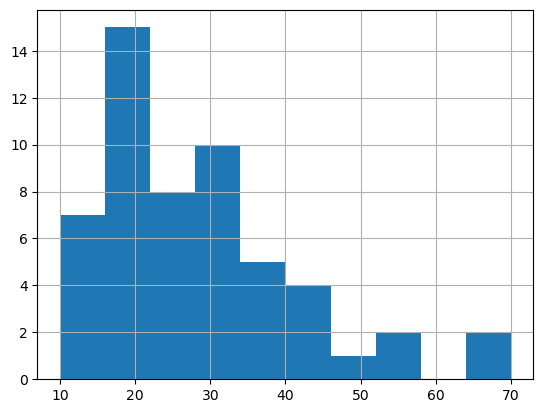

In [4]:
df.breaks.hist()

In [5]:
media = df.breaks.mean()
varianza = df.breaks.var()

print(f'La media es {media} y la varianza es {varianza}')

La media es 28.14814814814815 y la varianza es 174.20405310971347


In [6]:
variables = "breaks ~ wool + tension"
modelo_poisson = smf.glm(formula=variables, data=df, family=sm.families.Poisson(link=sm.families.links.log())).fit()

print(modelo_poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 breaks   No. Observations:                   54
Model:                            GLM   Df Residuals:                       50
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -242.53
Date:                Fri, 13 Oct 2023   Deviance:                       210.39
Time:                        18:28:54   Pearson chi2:                     213.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.8003
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.1735      0.056     57.002   

E:\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


# Interpretación de Resultados del Modelo Poisson

En el análisis llevado a cabo, se ajustó un modelo de regresión Poisson para predecir la variable breaks en función de las variables wool y tension. A continuación, se destacan las principales observaciones basadas en los resultados obtenidos:

- Tratamiento de Variables Categóricas: El paquete statsmodel de python, emplea el método de variables Dummy para manejar variables categóricas igual que R. En este contexto, se generó una variable Dummy para wool (explicando el tipo B) y dos para tension (para los niveles L y M). En ambas varaibles hay una categoria que no esta representada por una variable dummy esta actua como la categoria de referencia.

- Desviación Residual y Grados de Libertad: La desviación residual del modelo es 210.39, mientras que los grados de libertad residuales son 50. Dado que la desviación residual es superior a los grados de libertad, esto sugiere que el modelo captura adecuadamente la variabilidad en los datos. Sin embargo, es importante tener en cuenta que si la desviación residual hubiera sido significativamente mayor que los grados de libertad, esto podría haber indicado dispersión excesiva, lo que nos habría llevado a reconsiderar el ajuste del modelo.

- Comparación con el Modelo Nulo: Al comparar la desviación de nuestro modelo con un modelo nulo (que solo incluye el intercepto), buscamos entender el valor añadido de nuestras variables predictoras. Aunque no se presentó directamente un valor de desviación para el modelo nulo en los resultados, la significativa reducción en la desviación residual con la inclusión de las variables wool y tension sugiere que estas variables están mejorando el ajuste del modelo y contribuyendo de manera significativa a explicar la variabilidad en breaks.

En base a estos resultados, podemos concluir que las variables wool y tension tienen un impacto significativo en la variable respuesta breaks.